In [35]:
import torch
import torchvision
import os
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torchvision import transforms
#from torchvision import torch as d2l
import matplotlib.pyplot as plt
d2l.use_svg_display()
import cv2


In [36]:
net = nn.Sequential(
    nn.Conv2d(1, 4, kernel_size=5, padding=2), nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(4, 12, kernel_size=5), nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(12 * 5 * 5, 120), nn.ReLU(),
    nn.Linear(120, 60), nn.ReLU(),
    nn.Linear(60, 30), nn.ReLU(),
    nn.Linear(30, 10))

In [37]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 4, 28, 28])
ReLU output shape: 	 torch.Size([1, 4, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 4, 14, 14])
Conv2d output shape: 	 torch.Size([1, 12, 10, 10])
ReLU output shape: 	 torch.Size([1, 12, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 12, 5, 5])
Flatten output shape: 	 torch.Size([1, 300])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 60])
ReLU output shape: 	 torch.Size([1, 60])
Linear output shape: 	 torch.Size([1, 30])
ReLU output shape: 	 torch.Size([1, 30])
Linear output shape: 	 torch.Size([1, 10])


In [38]:

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


In [39]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
i = 0
#trans = transforms.ToTensor()
for X, y in train_iter:
    i = i + 1 
    print(f'{X.shape}')

len(train_iter)
#print(train_iter.name)

"""mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
X ,y = next(iter(data.DataLoader(dataset=mnist_train, batch_size=batch_size)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=None)#, titles=d2l.get_fashion_mnist_labels(y))
"""

torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([25

'mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)\nX ,y = next(iter(data.DataLoader(dataset=mnist_train, batch_size=batch_size)))\nshow_images(X.reshape(18, 28, 28), 2, 9, titles=None)#, titles=d2l.get_fashion_mnist_labels(y))\n'

In [40]:
img = torch.tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6863,
        0.3725, 0.2549, 0.2275, 0.0706, 0.0431, 0.0745, 0.0471, 0.0000, 0.2039,
        0.5059],[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6863,
        0.3725, 0.2549, 0.2275, 0.0706, 0.0431, 0.0745, 0.0471, 0.0000, 0.2039,
        0.5059]])
show_images(img.reshape(2, 28, 28), 1, 2, titles=None)

RuntimeError: shape '[2, 28, 28]' is invalid for input of size 56

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():   
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]


In [ ]:
#@save
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            #do not understand
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
            if i  == 10 and (epoch == 20):
                text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
                for k, m in enumerate(y):
                    print(f'labels:{k}, {text_labels[m]}\n')
                print('{y.shape[0]}\n')

        test_acc = evaluate_accuracy_gpu(net, test_iter)#used to draw curve
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')
    

loss 0.331, train acc 0.877, test acc 0.855
57288.7 examples/sec on cuda:0


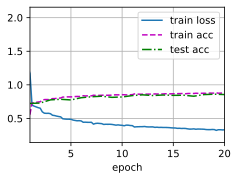

In [ ]:
lr, num_epochs = 0.045, 20
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
#y = net(X)



In [ ]:
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

0.weight 	 torch.Size([10, 1, 5, 5])
0.bias 	 torch.Size([10])
3.weight 	 torch.Size([20, 10, 5, 5])
3.bias 	 torch.Size([20])
7.weight 	 torch.Size([180, 500])
7.bias 	 torch.Size([180])
9.weight 	 torch.Size([100, 180])
9.bias 	 torch.Size([100])
11.weight 	 torch.Size([50, 100])
11.bias 	 torch.Size([50])
13.weight 	 torch.Size([10, 50])
13.bias 	 torch.Size([10])


In [ ]:
print(net.state_dict().keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '7.weight', '7.bias', '9.weight', '9.bias', '11.weight', '11.bias', '13.weight', '13.bias'])


In [ ]:
net_save_dir = "/home/iderea/下载/data_save_net"

In [ ]:
net_save_path = os.path.join(net_save_dir, 'net.pt')
torch.save(net.state_dict(), net_save_path)

In [ ]:
#@save
def inferrence_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    '''def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    '''
    print('inferrencing on', device)
    net.to(device)
    '''optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    '''
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter) 
    
    #load the net parameters saved
    print('***********parameters loading**************')
    net_save_path = os.path.join(net_save_dir, 'net.pt')
    if os.path.exists(net_save_path):
        loaded_paras = torch.load(net_save_path)
        net.load_state_dict(loaded_paras)
        net.eval() # be ccautious about this

    with torch.no_grad():
        for epoch in range(num_epochs):
            # 训练损失之和，训练准确率之和，样本数
            metric = d2l.Accumulator(2)
            net.train()
            for i, (X, y) in enumerate(train_iter):
                timer.start()
                #optimizer.zero_grad()
                X, y = X.to(device), y.to(device)
                y_hat = net(X)
                #l = loss(y_hat, y)
                #l.backward()
                #optimizer.step()
                #with torch.no_grad():
                metric.add(d2l.accuracy(y_hat, y), X.shape[0])
                timer.stop()
                #train_l = metric[0] / metric[2]
                train_acc = metric[0] / metric[1]
                #do not understand
                if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                    animator.add(epoch + (i + 1) / num_batches,
                                (train_acc, None))
                '''if i  == 10 and (epoch == 20):
                    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                                    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
                    for k, m in enumerate(y):
                        print(f'labels:{k}, {text_labels[m]}\n')
                    print('{y.shape[0]}\n')
                '''
            test_acc = evaluate_accuracy_gpu(net, test_iter)#used to draw curve
            animator.add(epoch + 1, (None, test_acc))
    print(f'train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[1] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')
    

KeyboardInterrupt: 

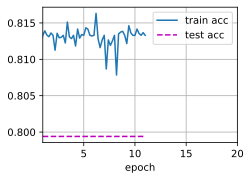

In [ ]:
lr, num_epochs = 0.05, 20
inferrence_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
#y = net(X)

